In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
#○from sklearn.impute import SimpleImputer
from sklearn.preprocessing import  OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge , Lasso
from sklearn import linear_model
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) # to avoid deprecation warnings

# PART1:
## 1.1 EDA:

In [2]:
# Import dataset
df_store_sales=pd.read_csv("Walmart_Store_sales.csv")

In [3]:
# preview of the da dataframe
print("Display of store sales dataset: ")
display(df_store_sales.head())
print()

Display of store sales dataset: 


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,6.0,18-02-2011,1572117.54,NaN,59.61,3.045,214.777523,6.858
1,13.0,25-03-2011,1807545.43,0.0,42.38,3.435,128.616064,7.470
2,17.0,27-07-2012,NaN,0.0,NaN,NaN,130.719581,5.936
3,11.0,NaN,1244390.03,0.0,84.57,NaN,214.556497,7.346
4,6.0,28-05-2010,1644470.66,0.0,78.89,2.759,212.412888,7.092


In [4]:
# number of rows in original weekly sales dataset
print("the number of rows in the original weekly sales dataset is: {}".format(len(df_store_sales["Weekly_Sales"])))
print()

the number of rows in the original weekly sales dataset is: 150



In [5]:
# Basic stats about store_sales
print("Basics statistics: ")
data_desc = df_store_sales.describe(include='all')
display(data_desc)
print()

print("number of missing values: ")
print(df_store_sales.isnull().sum())
print()

print("Percentage of missing values: ")
display(100*df_store_sales.isnull().sum()/df_store_sales.shape[0])



Basics statistics: 


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,150.000000,132,1.360000e+02,138.000000,132.000000,136.000000,138.000000,135.000000
unique,NaN,85,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,19-10-2012,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN
mean,9.866667,NaN,1.249536e+06,0.079710,61.398106,3.320853,179.898509,7.598430
std,6.231191,NaN,6.474630e+05,0.271831,18.378901,0.478149,40.274956,1.577173
min,1.000000,NaN,2.689290e+05,0.000000,18.790000,2.514000,126.111903,5.143000
25%,4.000000,NaN,6.050757e+05,0.000000,45.587500,2.852250,131.970831,6.597500
50%,9.000000,NaN,1.261424e+06,0.000000,62.985000,3.451000,197.908893,7.470000
75%,15.750000,NaN,1.806386e+06,0.000000,76.345000,3.706250,214.934616,8.150000



number of missing values: 
Store            0
Date            18
Weekly_Sales    14
Holiday_Flag    12
Temperature     18
Fuel_Price      14
CPI             12
Unemployment    15
dtype: int64

Percentage of missing values: 


Store            0.000000
Date            12.000000
Weekly_Sales     9.333333
Holiday_Flag     8.000000
Temperature     12.000000
Fuel_Price       9.333333
CPI              8.000000
Unemployment    10.000000
dtype: float64

### VISUALIZATIONS

In [6]:
#!pip install plotly -q
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

<AxesSubplot:xlabel='Store', ylabel='Weekly_Sales'>

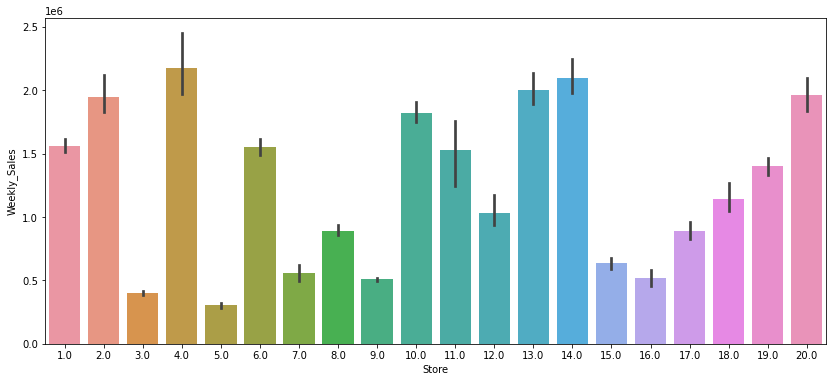

In [7]:
from matplotlib import rcParams
# figure size in inches
rcParams['figure.figsize'] = 14,6

#visualize relation between Store and  weekly sales
sns.barplot(data=df_store_sales, x = 'Store' , y = 'Weekly_Sales') #some stores seems to have better weekly sales

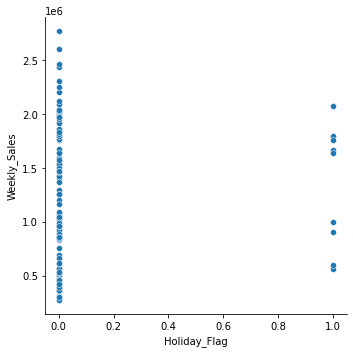

In [8]:
#visualize relation between Holiday_Flag and  weekly sales
sns.relplot(data=df_store_sales, x = 'Holiday_Flag' , y = 'Weekly_Sales')
#holidayflag has only 2 values (0 and 1) and the main data have holidayflag=0.0

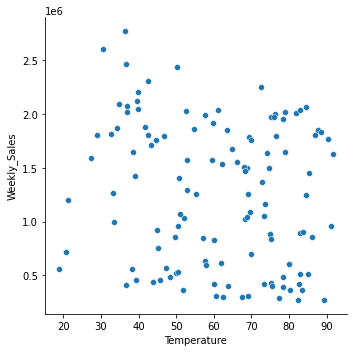

In [9]:
#visualize relation between Temperature and  weekly sales
sns.relplot(data = df_store_sales, x = 'Temperature' , y = 'Weekly_Sales')

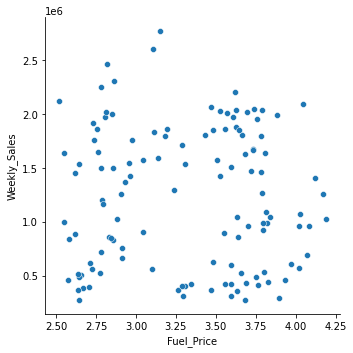

In [10]:
#visualize relation between Fuel_Price and  weekly sales
sns.relplot(data = df_store_sales, x = 'Fuel_Price' , y = 'Weekly_Sales')

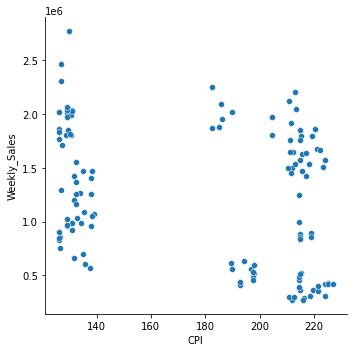

In [11]:

#visualize relation between CPI and  weekly sales
sns.relplot(data = df_store_sales, x = 'CPI' , y = 'Weekly_Sales')

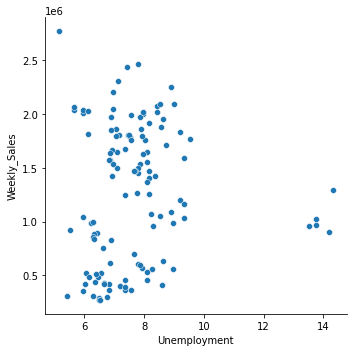

In [12]:
#visualize relation between unemployment and  weekly sales
sns.relplot(data = df_store_sales, x = 'Unemployment' , y = 'Weekly_Sales')
#we can see that there is some outliers -> (Unemployment > 13)

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Weekly_Sales', ylabel='Density'>

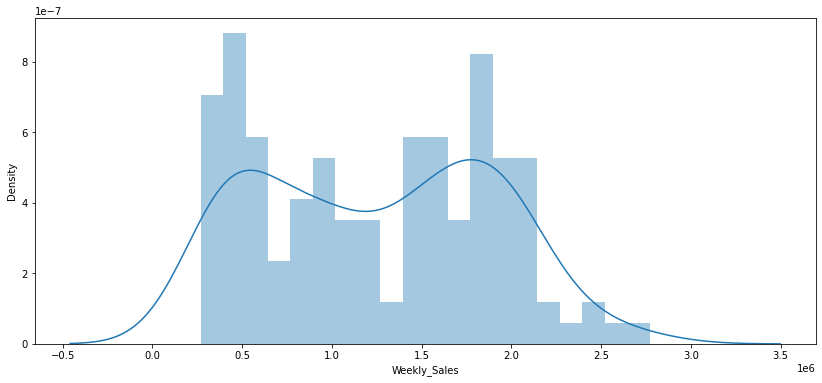

In [13]:
#visualize distribution of target value
sns.distplot(df_store_sales['Weekly_Sales'], bins=20)

## 1.2 PREPROCESSING

In [14]:
# Drop lines containing missing target value
print('Dropping the lines in the dataset for which the value in Weekly_Sales is missing...')
print()

to_keep = (df_store_sales['Weekly_Sales'].isnull()!=True) # We want keeping positives values or missings
df_store_sales = df_store_sales.loc[to_keep,:] 

print('Done. Number of lines remaining : ', df_store_sales.shape[0])

Dropping the lines in the dataset for which the value in Weekly_Sales is missing...

Done. Number of lines remaining :  136


In [15]:
df_store_sales.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,6.0,18-02-2011,1572117.54,NaN,59.61,3.045,214.777523,6.858
1,13.0,25-03-2011,1807545.43,0.0,42.38,3.435,128.616064,7.470
3,11.0,NaN,1244390.03,0.0,84.57,NaN,214.556497,7.346
4,6.0,28-05-2010,1644470.66,0.0,78.89,2.759,212.412888,7.092
5,4.0,28-05-2010,1857533.70,0.0,NaN,2.756,126.160226,7.896


In [16]:
print("Percentage of missing values after dropping messing weekly sales rows : ")
display(100*df_store_sales.isnull().sum()/df_store_sales.shape[0])

Percentage of missing values after dropping messing weekly sales rows : 


Store            0.000000
Date            13.235294
Weekly_Sales     0.000000
Holiday_Flag     8.088235
Temperature     11.029412
Fuel_Price       8.823529
CPI              8.088235
Unemployment    10.294118
dtype: float64

In [17]:
df_store_sales['Date'].value_counts()

19-10-2012    3
18-06-2010    3
25-03-2011    3
12-11-2010    3
16-03-2012    3
             ..
17-02-2012    1
02-03-2012    1
06-08-2010    1
05-02-2010    1
11-06-2010    1
Name: Date, Length: 79, dtype: int64

In [18]:
#import datetime
#import time
from datetime import datetime

In [19]:
df_store_sales['Date']=df_store_sales['Date'].fillna('19-10-2012')

In [20]:
df_store_sales.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,6.0,18-02-2011,1572117.54,NaN,59.61,3.045,214.777523,6.858
1,13.0,25-03-2011,1807545.43,0.0,42.38,3.435,128.616064,7.470
3,11.0,19-10-2012,1244390.03,0.0,84.57,NaN,214.556497,7.346
4,6.0,28-05-2010,1644470.66,0.0,78.89,2.759,212.412888,7.092
5,4.0,28-05-2010,1857533.70,0.0,NaN,2.756,126.160226,7.896


In [21]:
#convert Date to datetime
df_store_sales['Date']=[datetime.strptime(str(x), '%d-%m-%Y') for x in df_store_sales['Date']]


In [22]:
#add column day, month, year and weeklyday 

df_store_sales['day']= [x.day for x in df_store_sales['Date']]
df_store_sales['month']= [x.month for x in df_store_sales['Date']]
df_store_sales['year']= [x.year for x in df_store_sales['Date']]
df_store_sales['weekday']= [x.weekday() for x in df_store_sales['Date']]
df_store_sales.drop(columns='Date', inplace=True)


df_store_sales.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,day,month,year,weekday
0,6.0,1572117.54,NaN,59.61,3.045,214.777523,6.858,18,2,2011,4
1,13.0,1807545.43,0.0,42.38,3.435,128.616064,7.470,25,3,2011,4
3,11.0,1244390.03,0.0,84.57,NaN,214.556497,7.346,19,10,2012,4
4,6.0,1644470.66,0.0,78.89,2.759,212.412888,7.092,28,5,2010,4
5,4.0,1857533.70,0.0,NaN,2.756,126.160226,7.896,28,5,2010,4


In [23]:
#unique value in weekday
df_store_sales.weekday.unique() #weekday column have a unique value 4 = Friday so we can delete it

array([4], dtype=int64)

In [24]:
#drop weekday column
df_store_sales.drop('weekday', axis=1, inplace=True)
df_store_sales.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,day,month,year
0,6.0,1572117.54,NaN,59.61,3.045,214.777523,6.858,18,2,2011
1,13.0,1807545.43,0.0,42.38,3.435,128.616064,7.470,25,3,2011
3,11.0,1244390.03,0.0,84.57,NaN,214.556497,7.346,19,10,2012
4,6.0,1644470.66,0.0,78.89,2.759,212.412888,7.092,28,5,2010
5,4.0,1857533.70,0.0,NaN,2.756,126.160226,7.896,28,5,2010


##### LET VISUALIZE WEEKLY_SALE AND DATE

<AxesSubplot:xlabel='day', ylabel='Weekly_Sales'>

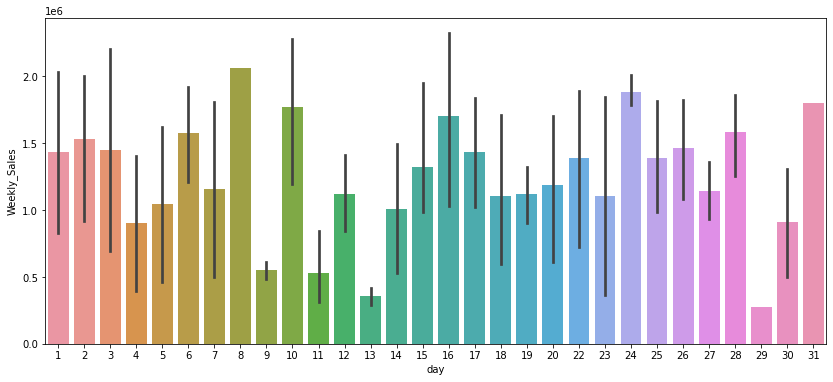

In [25]:
#visualize relation between day and  weekly sales
sns.barplot(data = df_store_sales, x = 'day' , y = 'Weekly_Sales')

<AxesSubplot:xlabel='month', ylabel='Weekly_Sales'>

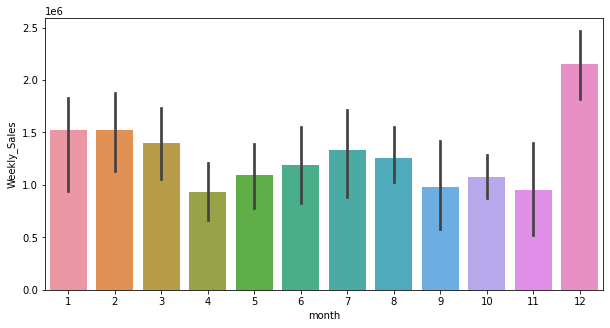

In [26]:
rcParams['figure.figsize'] = 10,5
#visualize relation between month and  weekly sales
sns.barplot(data = df_store_sales, x = 'month' , y = 'Weekly_Sales') #december seems to have more sales then the other months

<AxesSubplot:xlabel='year', ylabel='Weekly_Sales'>

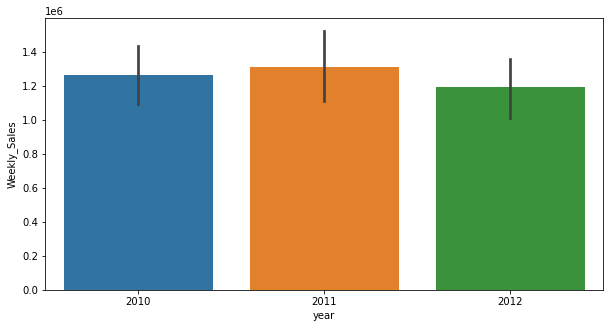

In [27]:
#visualize relation between year and  weekly sales
sns.barplot(data = df_store_sales, x = 'year' , y = 'Weekly_Sales') 

In [28]:
#convert temperature from fahrenheit to celsius
df_store_sales.Temperature=[(x-32)*(5/9) for x in df_store_sales.Temperature] 
df_store_sales.rename(columns={'Temperature':'Temperature_C°'}, inplace=True)

df_store_sales.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature_C°,Fuel_Price,CPI,Unemployment,day,month,year
0,6.0,1572117.54,NaN,15.338889,3.045,214.777523,6.858,18,2,2011
1,13.0,1807545.43,0.0,5.766667,3.435,128.616064,7.470,25,3,2011
3,11.0,1244390.03,0.0,29.205556,NaN,214.556497,7.346,19,10,2012
4,6.0,1644470.66,0.0,26.050000,2.759,212.412888,7.092,28,5,2010
5,4.0,1857533.70,0.0,NaN,2.756,126.160226,7.896,28,5,2010


In [29]:
# Drop lines containing outliers (using masks) within Temperature, Fuel_price, CPI, Unemployment and Weekly_Sales
print('Dropping outliers ')
for col in ['Weekly_Sales', 'Temperature_C°', 'Fuel_Price', 'CPI', 'Unemployment']:
    to_keep = (df_store_sales[col] < df_store_sales[col].mean() + 3*df_store_sales[col].std()) & (df_store_sales[col] > df_store_sales[col].mean() - 3*df_store_sales[col].std())
    df_store_sales = df_store_sales.loc[to_keep,:]

print('Number of lines remaining : ', df_store_sales.shape[0])
print()

df_store_sales.head()

Dropping outliers 
Number of lines remaining :  90



,Store,Weekly_Sales,Holiday_Flag,Temperature_C°,Fuel_Price,CPI,Unemployment,day,month,year
0,6.0,1572117.54,NaN,15.338889,3.045,214.777523,6.858,18,2,2011
1,13.0,1807545.43,0.0,5.766667,3.435,128.616064,7.470,25,3,2011
4,6.0,1644470.66,0.0,26.050000,2.759,212.412888,7.092,28,5,2010
6,15.0,695396.19,0.0,21.000000,4.069,134.855161,7.658,3,6,2011
7,20.0,2203523.20,0.0,4.405556,3.617,213.023622,6.961,3,2,2012


In [30]:
df_store_sales.Holiday_Flag.fillna(0.0, inplace=True)

In [31]:
print("number of missing values: ")
print(df_store_sales.isnull().sum())
print()

number of missing values: 
Store             0
Weekly_Sales      0
Holiday_Flag      0
Temperature_C°    0
Fuel_Price        0
CPI               0
Unemployment      0
day               0
month             0
year              0
dtype: int64



In [33]:
df_store_sales.reset_index(drop=True,inplace=True)

In [34]:
df_store_sales.describe(include='all')

,Store,Weekly_Sales,Holiday_Flag,Temperature_C°,Fuel_Price,CPI,Unemployment,day,month,year
count,90.000000,9.000000e+01,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,9.900000,1.233865e+06,0.066667,16.145000,3.318444,179.524905,7.389733,16.444444,6.766667,2011.011111
std,6.204475,6.647250e+05,0.250841,9.858911,0.484399,39.554303,0.982729,8.079814,3.076004,0.854525
min,1.000000,2.689290e+05,0.000000,-7.338889,2.548000,126.128355,5.143000,1.000000,1.000000,2010.000000
25%,4.000000,5.617240e+05,0.000000,7.412500,2.814750,132.602339,6.642250,11.000000,4.000000,2010.000000
50%,9.000000,1.260826e+06,0.000000,16.361111,3.468000,197.166416,7.419000,18.000000,7.000000,2011.000000
75%,15.750000,1.807159e+06,0.000000,24.329167,3.737750,214.855374,8.099000,22.000000,10.000000,2012.000000
max,20.000000,2.771397e+06,1.000000,33.138889,4.170000,226.968844,9.342000,31.000000,12.000000,2012.000000


In [35]:
print("number of missing values: ")
print(df_store_sales.isnull().sum())
print()

number of missing values: 
Store             0
Weekly_Sales      0
Holiday_Flag      0
Temperature_C°    0
Fuel_Price        0
CPI               0
Unemployment      0
day               0
month             0
year              0
dtype: int64



## PREPROCESSING WITH SCIKITLEARN

In [36]:
# Separate target variable Y from features X
target_name = 'Weekly_Sales'

print("Separating labels from features...")
Y = df_store_sales.loc[:,target_name]
X = df_store_sales.loc[:,[c for c in df_store_sales.columns if c!=target_name]] # All columns are kept, except the target
print("...Done.")
print(Y.head())
print()
print(X.head())
print()

Separating labels from features...
...Done.
0    1572117.54
1    1807545.43
2    1644470.66
3     695396.19
4    2203523.20
Name: Weekly_Sales, dtype: float64

   Store  Holiday_Flag  Temperature_C°  Fuel_Price         CPI  Unemployment  \
0    6.0           0.0       15.338889       3.045  214.777523         6.858   
1   13.0           0.0        5.766667       3.435  128.616064         7.470   
2    6.0           0.0       26.050000       2.759  212.412888         7.092   
3   15.0           0.0       21.000000       4.069  134.855161         7.658   
4   20.0           0.0        4.405556       3.617  213.023622         6.961   

   day  month  year  
0   18      2  2011  
1   25      3  2011  
2   28      5  2010  
3    3      6  2011  
4    3      2  2012  



In [37]:
print("Dividing into train and test sets...")
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
print("...Done.")
print()

Dividing into train and test sets...
...Done.



In [38]:
'''
# Convert pandas DataFrames to numpy arrays before using scikit-learn
print("Convert pandas DataFrames to numpy arrays...")
X_train = X_train.values
X_test = X_test.values
Y_train = Y_train.tolist()
Y_test = Y_test.tolist()
print("...Done")
'''

'\n# Convert pandas DataFrames to numpy arrays before using scikit-learn\nprint("Convert pandas DataFrames to numpy arrays...")\nX_train = X_train.values\nX_test = X_test.values\nY_train = Y_train.tolist()\nY_test = Y_test.tolist()\nprint("...Done")\n'

In [39]:
df_store_sales.Holiday_Flag.value_counts()

0.0    84
1.0     6
Name: Holiday_Flag, dtype: int64

In [40]:
df_store_sales.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature_C°,Fuel_Price,CPI,Unemployment,day,month,year
0,6.0,1572117.54,0.0,15.338889,3.045,214.777523,6.858,18,2,2011
1,13.0,1807545.43,0.0,5.766667,3.435,128.616064,7.470,25,3,2011
2,6.0,1644470.66,0.0,26.050000,2.759,212.412888,7.092,28,5,2010
3,15.0,695396.19,0.0,21.000000,4.069,134.855161,7.658,3,6,2011
4,20.0,2203523.20,0.0,4.405556,3.617,213.023622,6.961,3,2,2012


In [41]:
# Create pipeline for numeric features
numeric_features = ['Temperature_C°', 'Fuel_Price','CPI', 'Unemployment', 'day', 'month', 'year'] # Positions of numeric columns in X_train/X_test
numeric_transformer = Pipeline(steps=[
    #('imputer', SimpleImputer(strategy='median')), # missing values will be replaced by columns' median
    ('scaler', StandardScaler())
])

In [42]:
# Create pipeline for categorical features
categorical_features = ['Store','Holiday_Flag'] # Positions of categorical columns in X_train/X_test
categorical_transformer = Pipeline(
    steps=[
    #('imputer', SimpleImputer(strategy='most_frequent')), # missing values will be replaced by most frequent value
    ('encoder', OneHotEncoder(drop='first')) # first column will be dropped to avoid creating correlations between features
    ])

In [43]:
# Use ColumnTransformer to make a preprocessor object that describes all the treatments to be done
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [44]:
# Preprocessings on train set
print("Performing preprocessings on train set...")
X_train = preprocessor.fit_transform(X_train)
print('...Done.')
print()

# Preprocessings on test set
print("Performing preprocessings on test set...")
X_test = preprocessor.transform(X_test) 
print('...Done.')
print()

Performing preprocessings on train set...
...Done.

Performing preprocessings on test set...
...Done.



# Part 2 : Baseline model (linear regression)

## LINEAR REGRESSION MODEL

In [45]:
# Train model
print("Train model...")
regressor = LinearRegression()
regressor.fit(X_train, Y_train)
print("...Done.")

Train model...
...Done.


In [46]:
# Predictions on training set
print("Predictions on training set...")
Y_train_pred = regressor.predict(X_train)
print("...Done.")
print(Y_train_pred)
print()

Predictions on training set...
...Done.
[ 612282.3550322   371243.89512298 1274596.1000452   880826.20201092
 1535779.69200997 1516820.85023211 1968120.0881668   602655.36368138
  949919.44964708 1083036.48931095 2125109.04773657  646903.47477037
 2143299.45515874  613176.73244871  515735.6001872   785146.41143431
  623924.02154825 1638884.11504048  168094.104112    532799.36445859
 1848221.76560452 2113988.20824111 1118309.37749082 1453640.34316145
 2066238.88164905 1946100.69560345  416016.41877103 2018126.99106748
  908047.23554909 1622116.4364512  2041731.28583096 1563818.28510249
 1544706.92340369 1917749.6891347   333756.15775489  514289.330874
  929272.64833825 1517727.49541487 2020461.46935718 2057184.45033972
  520604.47654979 1940942.25404847 1593955.32864028  427135.30110701
  243011.0057866   503071.79660925  437368.1649678  1790958.56137096
 1967093.06872452  421604.60735103 2067753.42710155 1883968.68269466
  792405.31022744 1542733.2701451   471197.62466741  408988.02497

In [47]:
# Predictions on test set
print("Predictions on test set...")
Y_test_pred = regressor.predict(X_test)
print("...Done.")
print(Y_test_pred)
print()

Predictions on test set...
...Done.
[1569444.20904305  680469.59999302 1887607.61945103 1781546.68437637
  397571.93077216  224287.91365321 1216147.38136119 2171251.38473204
 2001682.9660976  1335377.49181732 1176500.00207957  971510.52625537
  441983.36438483  353747.69327111  527735.2141268  1353531.42106822
 2016691.98514931  420675.99049977]



In [48]:
# Print R^2 scores
print("R2 score on training set : ", r2_score(Y_train, Y_train_pred))
print("R2 score on test set : ", r2_score(Y_test, Y_test_pred))

R2 score on training set :  0.9868222020153995
R2 score on test set :  0.9361757872058227


In [49]:
LinearRegression_scores=[r2_score(Y_train, Y_train_pred),r2_score(Y_test, Y_test_pred)]

In [50]:
coef_list=abs(regressor.coef_)
coef_list


array([1.06820017e+04, 6.05177077e+04, 6.67146452e+05, 3.46859351e+04,
       4.95035329e+04, 2.05183349e+04, 1.48404796e+03, 2.68976329e+05,
       1.24427108e+06, 2.09615044e+06, 1.22350183e+06, 1.04151528e+05,
       6.52566122e+05, 6.48753298e+05, 1.09494045e+06, 1.67699488e+06,
       2.20875201e+05, 1.95566032e+06, 9.77766961e+05, 4.85401752e+05,
       6.01460264e+05, 7.47915903e+05, 8.77830990e+05, 1.22561934e+06,
       5.86091606e+05, 5.24698984e+04])

In [51]:
feature_name_list=preprocessor.get_feature_names_out()
feature_name_list

array(['num__Temperature_C°', 'num__Fuel_Price', 'num__CPI',
       'num__Unemployment', 'num__day', 'num__month', 'num__year',
       'cat__Store_2.0', 'cat__Store_3.0', 'cat__Store_4.0',
       'cat__Store_5.0', 'cat__Store_6.0', 'cat__Store_7.0',
       'cat__Store_8.0', 'cat__Store_9.0', 'cat__Store_10.0',
       'cat__Store_11.0', 'cat__Store_13.0', 'cat__Store_14.0',
       'cat__Store_15.0', 'cat__Store_16.0', 'cat__Store_17.0',
       'cat__Store_18.0', 'cat__Store_19.0', 'cat__Store_20.0',
       'cat__Holiday_Flag_1.0'], dtype=object)

In [52]:
data={'features':feature_name_list,'coef':coef_list}
df_coef=pd.DataFrame(data=data)
df_coef.sort_values(by=['coef'], inplace=True, ascending=False)
df_coef.head(10)

,features,coef
9,cat__Store_4.0,2.096150e+06
17,cat__Store_13.0,1.955660e+06
15,cat__Store_10.0,1.676995e+06
8,cat__Store_3.0,1.244271e+06
23,cat__Store_19.0,1.225619e+06
10,cat__Store_5.0,1.223502e+06
14,cat__Store_9.0,1.094940e+06
18,cat__Store_14.0,9.777670e+05
22,cat__Store_18.0,8.778310e+05
21,cat__Store_17.0,7.479159e+05


<AxesSubplot:xlabel='coef', ylabel='features'>

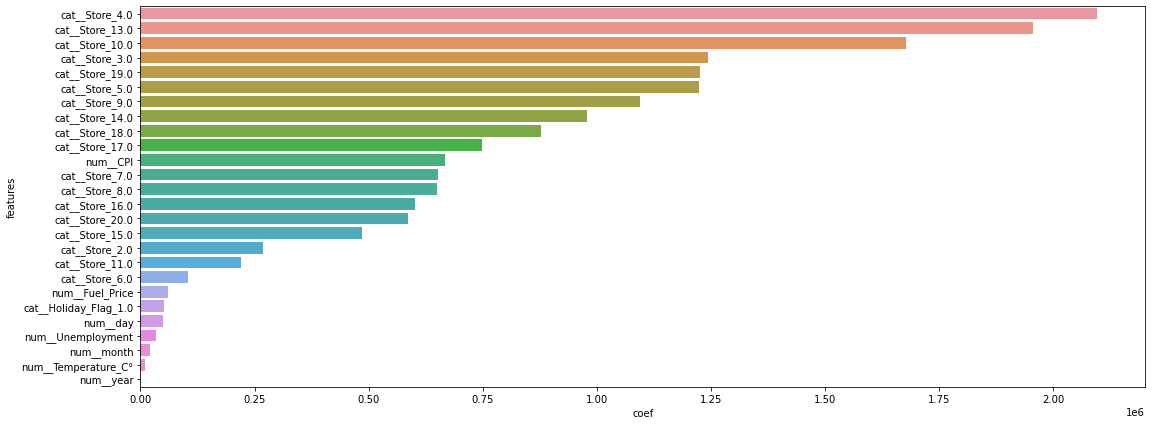

In [53]:
rcParams['figure.figsize'] = 18,7
#visualize relation between month and  weekly sales
sns.barplot(data = df_coef, x ='coef' , y =  'features')

# Part 3 : Fight overfitting

## RIDGE MODEL ALPHA=1

In [54]:
### Ridge model

In [55]:
clf1 = Ridge(alpha=1)
clf1.fit(X_train, Y_train)
print("train score:{}".format(clf1.score(X_train, Y_train)))
print("test score:{}".format(clf1.score(X_test, Y_test)))

train score:0.9310690177394269
test score:0.8266527225090005


In [56]:
ridge_scores=[clf1.score(X_train, Y_train),clf1.score(X_test, Y_test)]

In [57]:
coef_list1=["{:.2e}".format(x) for x in clf1.coef_]
print(np.array(coef_list1))

['1.77e+04' '-5.42e+04' '-5.38e+04' '1.12e+05' '-3.33e+04' '-4.50e+03'
 '5.31e+04' '3.81e+05' '-7.27e+05' '6.65e+05' '-6.55e+05' '2.77e+05'
 '-7.19e+05' '-2.10e+05' '-5.13e+05' '1.40e+05' '2.26e+05' '5.72e+05'
 '4.64e+05' '-6.01e+05' '-4.47e+05' '-3.38e+05' '-3.71e+05' '-3.67e+04'
 '5.97e+05' '3.68e+04']


## LASSO MODEL ALPHA=1

In [58]:
### Lasso model

In [59]:
clf_lasso = Lasso(alpha=1,fit_intercept=False)
clf_lasso.fit(X_train, Y_train)
print("train score:{}".format(clf_lasso.score(X_train, Y_train)))
print("test score:{}".format(clf_lasso.score(X_test, Y_test)))

train score:0.9841290347347956
test score:0.9239812789844446


In [60]:
lasso_scores=[clf_lasso.score(X_train, Y_train),clf_lasso.score(X_test, Y_test)]

In [61]:
coef_list=["{:.2e}".format(x) for x in clf_lasso.coef_]
print(np.array(coef_list))

['-3.64e+03' '-7.79e+04' '1.72e+06' '7.61e+04' '-4.54e+04' '5.33e+03'
 '-5.50e+04' '3.39e+05' '-1.31e+06' '4.56e+06' '-1.18e+06' '1.51e+05'
 '-7.95e+04' '-6.39e+05' '-1.08e+06' '4.14e+06' '1.74e+05' '4.39e+06'
 '1.77e+06' '2.75e+06' '1.11e+05' '3.21e+06' '3.13e+06' '3.44e+06'
 '8.21e+05' '-2.76e+04']


## GRIDSEARCH CV FOR RIDGE MODEL

In [62]:
# Perform grid search
print("Grid search...")
clf_ridge = Ridge()
# Grid of values to be tested
params = {
    'alpha': [0.0, 0.001,0.003, 0.004, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0] # 0 corresponds to no regularization
}
gridsearch = GridSearchCV(clf_ridge, param_grid = params, scoring='r2' , cv = 10) # cv : the number of folds to be used for CV
gridsearch.fit(X_train, Y_train)
print("...Done.")
print("Best hyperparameters : ", gridsearch.best_params_)

Grid search...
...Done.
Best hyperparameters :  {'alpha': 0.004}


In [63]:
# Predictions on training set
# The model has already be re-trained on all the training set at the end of the grid search, so we can directly use it !
print("Predictions on training set...")
Y_train_pred = gridsearch.predict(X_train)
print("...Done.")
print(Y_train_pred)
print()

# Predictions on test set
print("Predictions on test set...")
Y_test_pred = gridsearch.predict(X_test)
print("...Done.")
print(Y_test_pred)
print()

Predictions on training set...
...Done.
[ 608353.67267786  352255.43658468 1287965.23701316  879891.45518752
 1556311.51592705 1523574.56948332 1981515.07307344  616854.16461733
  955548.57636849 1064494.12192    2129884.67777721  645673.96459487
 2124809.48483352  614443.16441613  517590.61607757  810734.35136384
  612312.02253955 1622291.74694187  181296.95457738  536599.90119179
 1864251.71642361 2103343.28682065 1102050.4802187  1457876.25533845
 2055803.30678876 1945457.27189962  414755.71167246 2022184.90167591
  903792.14874373 1626931.14241334 2065837.64064258 1560574.25501338
 1545649.16927038 1910180.36077716  335526.16140566  517665.48360776
  921941.23689714 1511566.99828843 2023661.66289355 2053497.56164763
  524471.37613154 1930994.81518966 1602919.34334501  418009.95194651
  255652.00334529  506136.79019428  444693.22691117 1758691.8428567
 1965339.69179346  401311.75814492 2063371.82340378 1898022.42864778
  774723.76351983 1536591.49629053  468367.16768474  407037.7660

In [64]:
# Print R^2 scores on train/test sets for the Ridge model with optimal value of the regularization strength
print("R2 score on training set : ", r2_score(Y_train, Y_train_pred))
print("R2 score on test set : ", r2_score(Y_test, Y_test_pred))

R2 score on training set :  0.9864626199851254
R2 score on test set :  0.9373843098911384


In [65]:
grid_ridge_scores=[r2_score(Y_train, Y_train_pred),r2_score(Y_test, Y_test_pred)]

## GRIDSEARCH CV FOR LASSO MODEL

In [66]:
# Perform grid search
print("Grid search...")
clf_lasso = linear_model.Lasso(fit_intercept=False)
# Grid of values to be tested
params = {
    'alpha': [0.0, 0.001,0.005, 0.01, 0.05, 0.1, 0.5, 1.0] # 0 corresponds to no regularization
}
gridsearch_lasso = GridSearchCV(clf_ridge, param_grid = params, scoring='r2' , cv = 5, refit=True) # cv : the number of folds to be used for CV
gridsearch_lasso.fit(X_train, Y_train)
print("...Done.")
print("Best hyperparameters : ", gridsearch_lasso.best_params_)
#print("Best R2 score : ", gridsearch.best_score_)

Grid search...
...Done.
Best hyperparameters :  {'alpha': 0.01}


In [67]:
# Predictions on training set
# The model has already be re-trained on all the training set at the end of the grid search, so we can directly use it !
print("Predictions on training set...")
Y_train_pred = gridsearch_lasso.predict(X_train)
print("...Done.")
print(Y_train_pred)
print()

# Predictions on test set
print("Predictions on test set...")
Y_test_pred = gridsearch_lasso.predict(X_test)
print("...Done.")
print(Y_test_pred)
print()

Predictions on training set...
...Done.
[ 610105.28030801  347156.47116866 1290369.40029809  881557.50619913
 1557006.4852064  1520936.8230823  1983081.05388202  622152.24799114
  956771.38508476 1060496.80940422 2129332.34288862  645325.22722886
 2122054.90472173  616083.3434525   518768.85137883  816625.13729715
  611402.40035871 1613953.37938082  187773.25137304  539614.98587847
 1868441.22413553 2100085.40781471 1096721.28561426 1460613.96969554
 2052753.8891045  1944343.21845538  415504.95605219 2021571.03793996
  903998.41157241 1627972.84880168 2069270.69117429 1557509.32946379
 1545409.39583619 1906818.61780053  339045.90066953  519411.69013709
  921903.92571273 1509271.03373211 2024134.43941388 2050994.19466542
  525531.67460398 1929606.4214726  1602579.42406018  416663.99067246
  261460.7579559   507358.5819556   448540.13085705 1749521.01818687
 1965644.13323027  395269.12681665 2061563.52431476 1900576.45699352
  771837.10941576 1535171.22883231  469993.6347052   407116.352

In [68]:
# Print R^2 scores on train/test sets for the Ridge model with optimal value of the regularization strength
print("R2 score on training set : ", r2_score(Y_train, Y_train_pred))
print("R2 score on test set : ", r2_score(Y_test, Y_test_pred))

R2 score on training set :  0.9862446817405773
R2 score on test set :  0.9368689343216051


In [69]:
grid_lasso_scores=[r2_score(Y_train, Y_train_pred),r2_score(Y_test, Y_test_pred)]

# CONCLUSION

In [70]:
scores={'LinearRegression_scores':LinearRegression_scores, 'ridge_scores':ridge_scores, 'lasso_scores':lasso_scores, 'grid_ridge_scores':grid_ridge_scores,'grid_lasso_scores':grid_lasso_scores}
scores_df=pd.DataFrame(scores,index=['train','test'])
scores_df.head()

,LinearRegression_scores,ridge_scores,lasso_scores,grid_ridge_scores,grid_lasso_scores
train,0.986822,0.931069,0.984129,0.986463,0.986245
test,0.936176,0.826653,0.923981,0.937384,0.936869


In [ ]:
#we can see that there is a very small overfitting which is not reduced a lot with ridge and lasso models but generally the model is very well performing